In [163]:
import fcsparser
from api import FCSParser
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, linear_model
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

Reading in the first fcs file and the labels file

In [164]:
path='Well_C03.fcs'

In [165]:
meta, df = fcsparser.parse(path, reformat_meta=True)
labels=pd.DataFrame.from_csv('live_dead_debris__labels.csv')

In [166]:
c3_index=labels[labels.index=="screen-934-cell-plate-1-well-C3.fcs_43745"]
c4_index=labels[labels.index=="screen-934-cell-plate-1-well-C4.fcs_43745"]

Merging the fcs data and the labels for well c3 into one dataframe

In [177]:
df['event']=(df.index+1)
df_c3_wlabels=pd.merge(df, c3_index, on='event')

In [172]:
df.columns.values[:17]

array(['FSC-H', 'SSC-H', 'CD66B H : FITC H', 'KIT H : PE H', 'BL3-H',
       'BL4-H', 'CD19 H : CD3 H : PE-CY7 H', 'CD11C H : APC H',
       'CD11B H : APC-CY7 H', 'DAPI H', 'CD33 H : BV510 H', 'VL3-H',
       'CD34 H : BV605 H', 'VL5-H', 'VL6-H', 'FSC-A', 'SSC-A'], dtype=object)

In [175]:
def scatter_plot(channel1, channel2, dframe):
    x_dead=dframe[dframe['label']=='dead'][channel1]
    y_dead=dframe[dframe['label']=='dead'][channel2]
    x_live=dframe[dframe['label']=='live'][channel1]
    y_live=dframe[dframe['label']=='live'][channel2]
    x_debris=dframe[dframe['label']=='debris'][channel1]
    y_debris=dframe[dframe['label']=='debris'][channel2]
    plt.scatter(x_dead,y_dead,color='red',label="dead")
    plt.scatter(x_live,y_live,color='blue',label="live")
    plt.scatter(x_debris,y_debris,color='green',label="debris")
    plt.xlabel(channel1)
    plt.ylabel(channel2)
    plt.legend()
    plt.show()

A scatter plot of FCS-H vs SSC-H, there is significant overlap between the categories

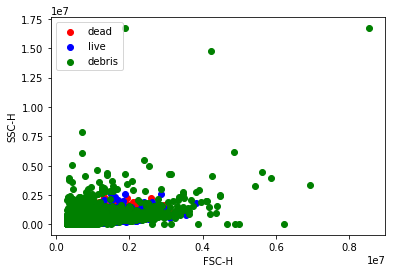

In [176]:
scatter_plot('FSC-H','SSC-H',df_c3_wlabels)

Several scatter plots using pairs of channels, looking for pairs that show a clear separation, none are obvious

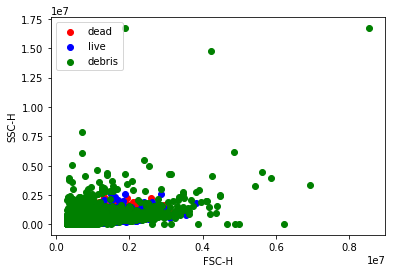

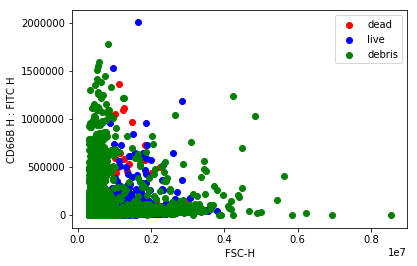

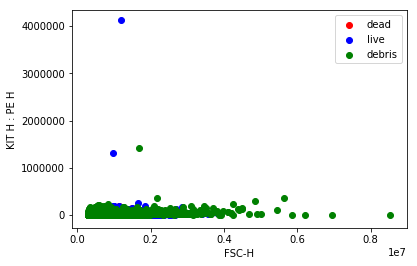

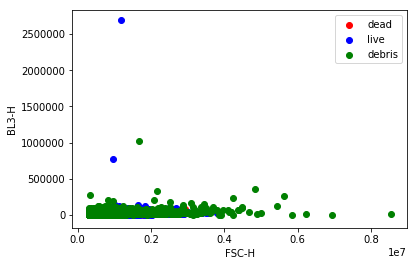

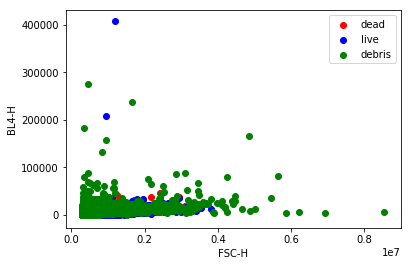

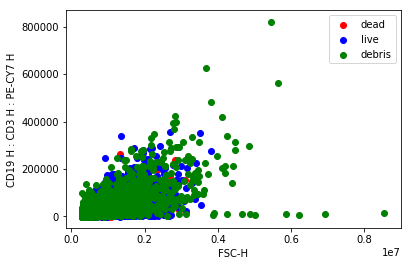

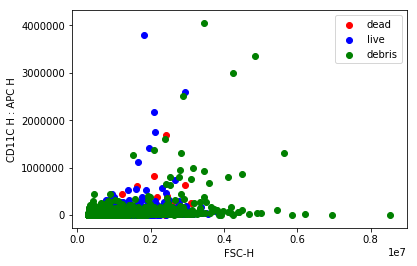

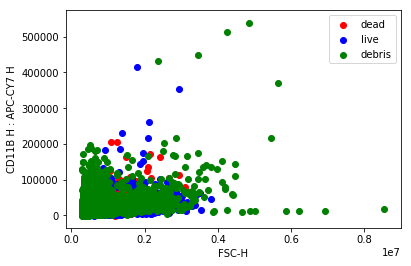

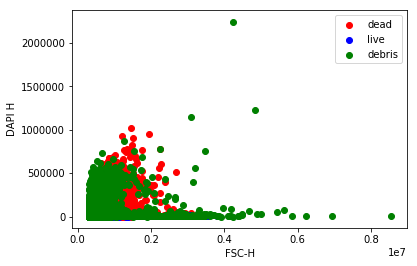

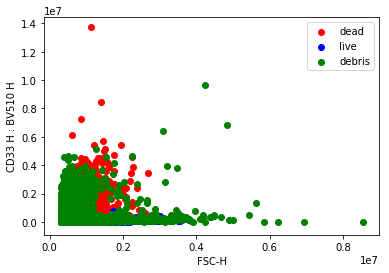

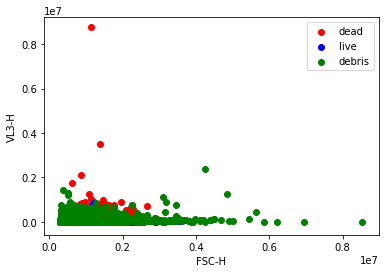

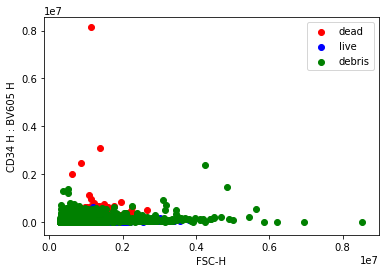

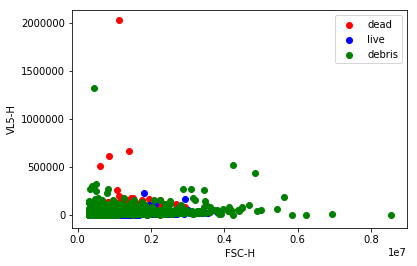

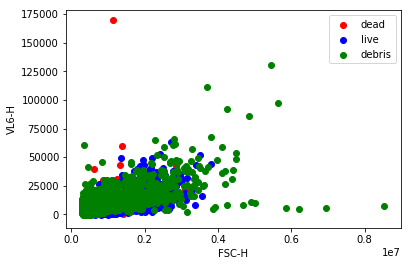

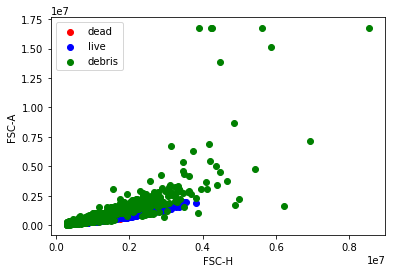

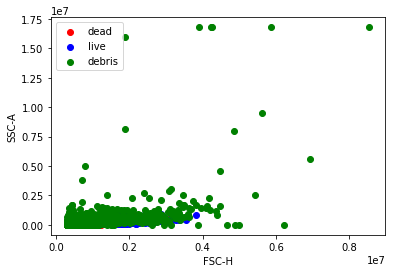

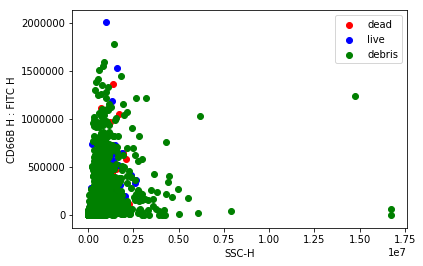

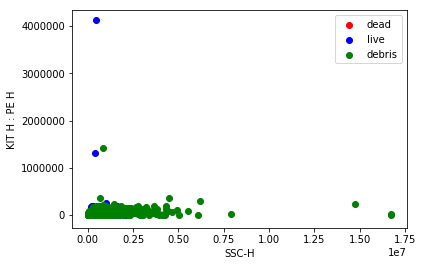

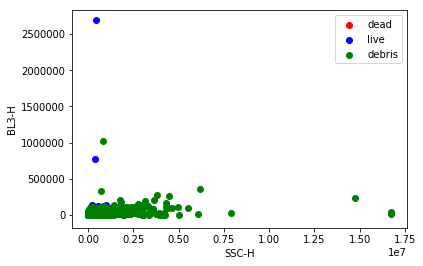

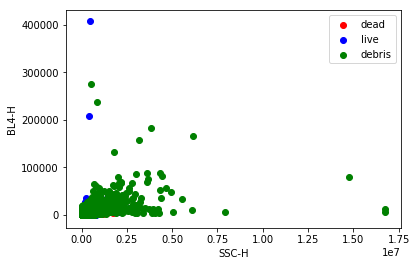

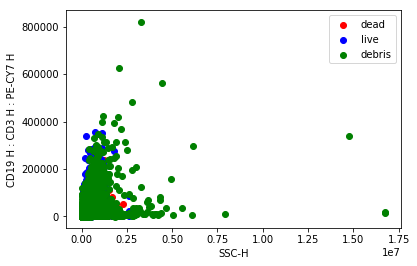

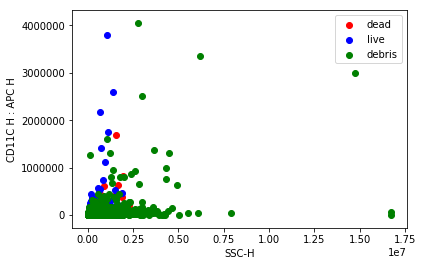

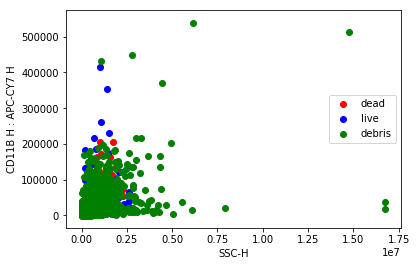

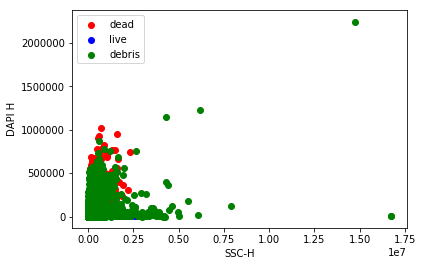

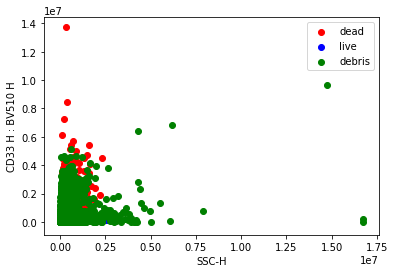

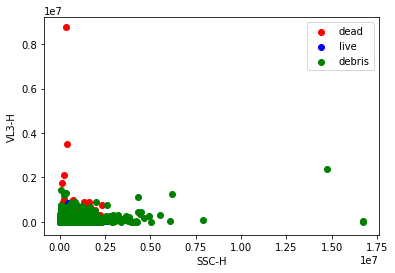

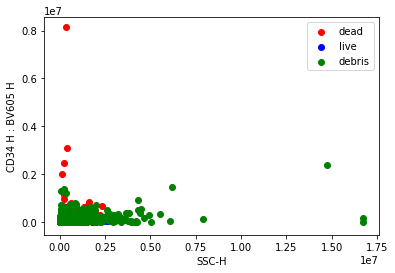

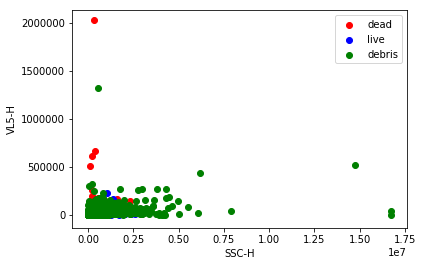

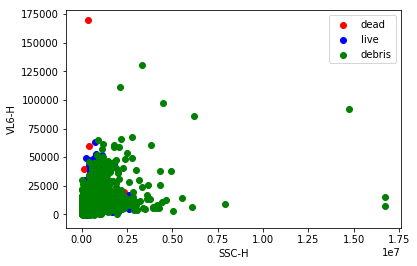

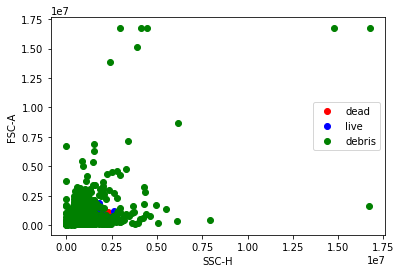

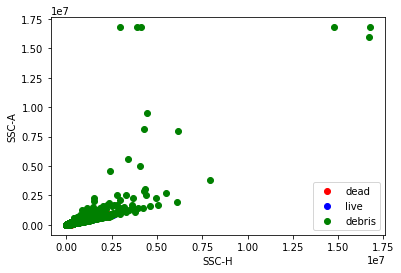

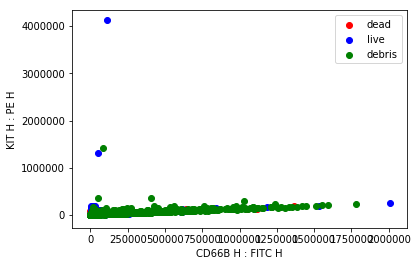

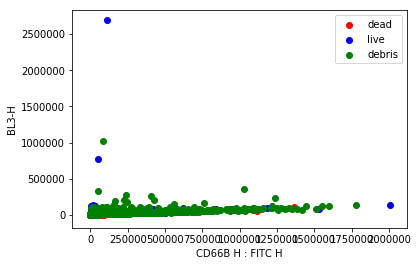

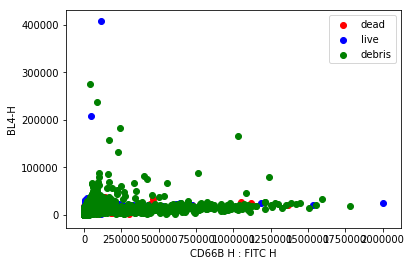

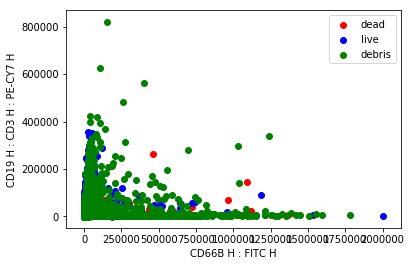

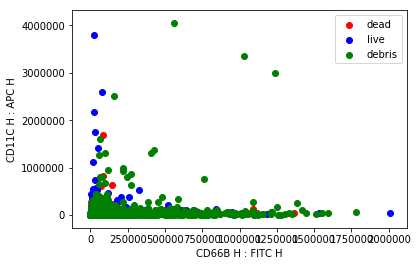

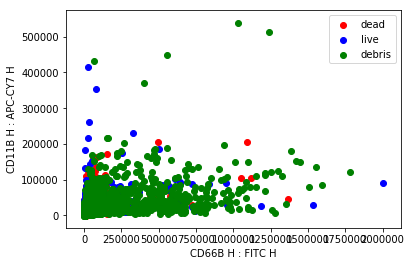

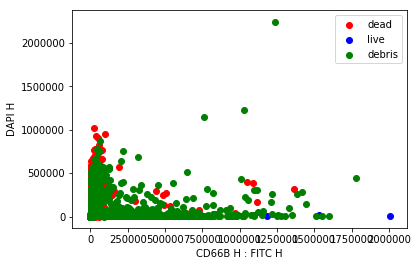

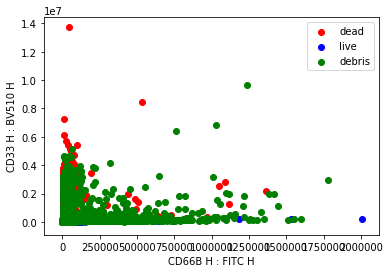

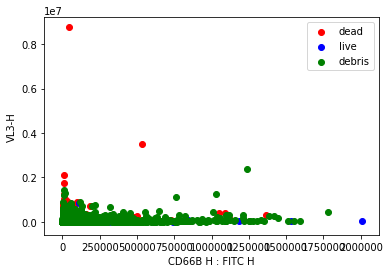

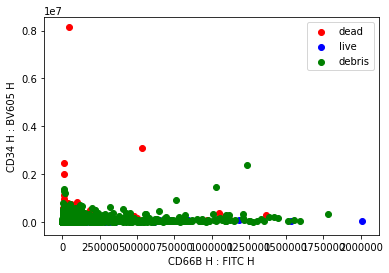

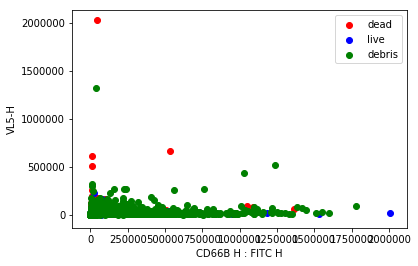

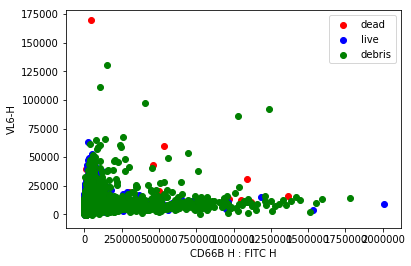

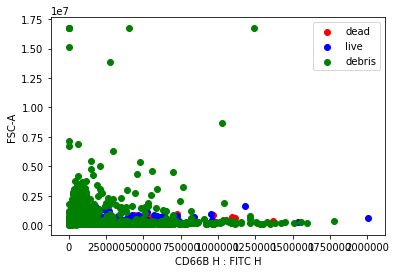

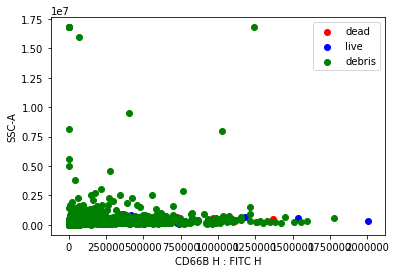

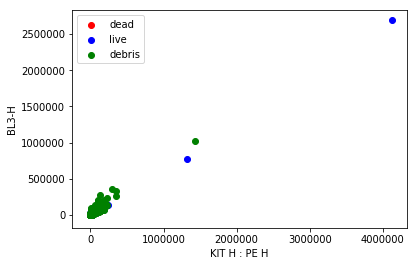

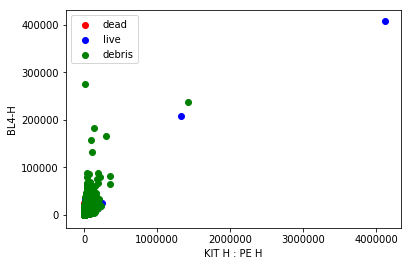

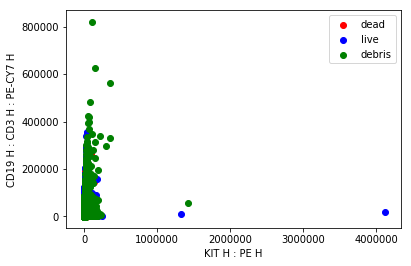

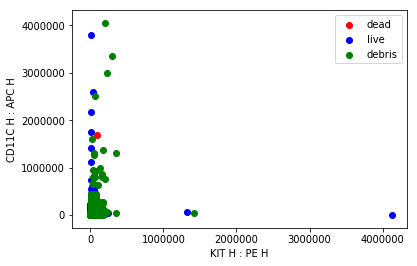

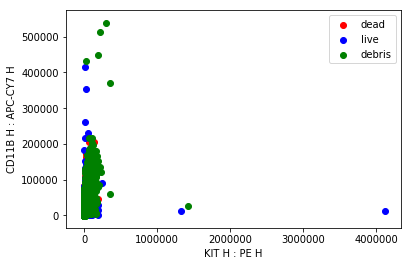

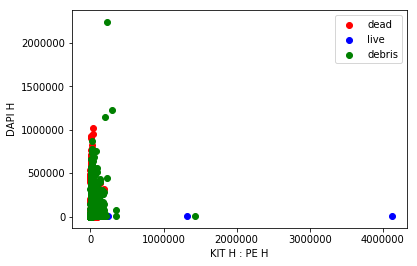

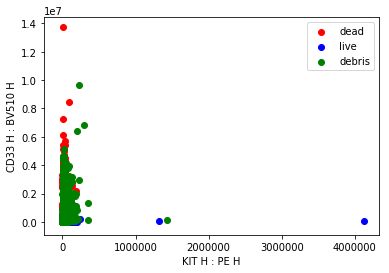

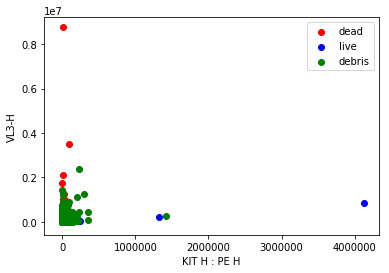

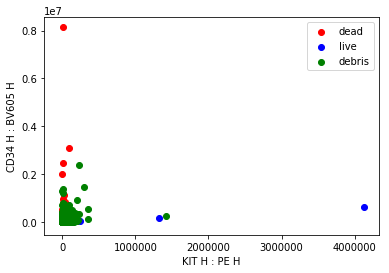

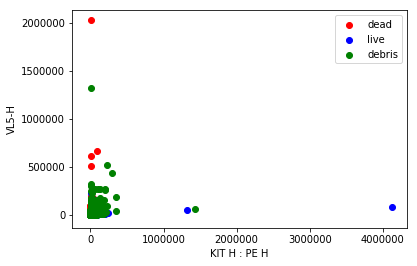

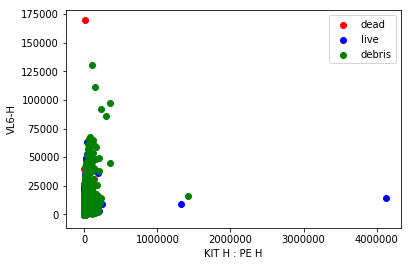

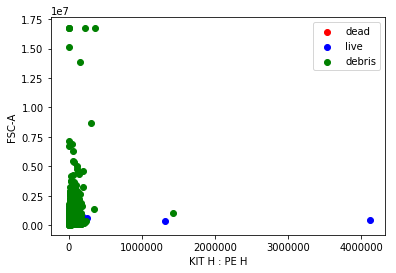

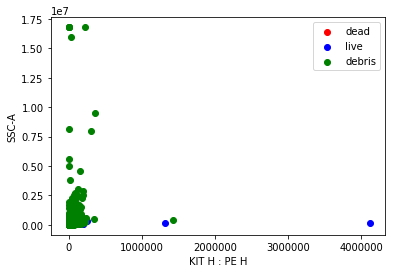

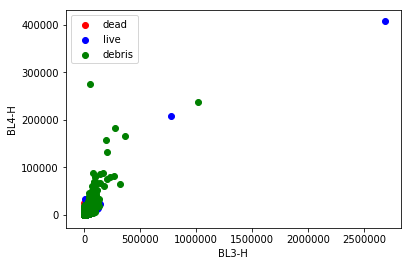

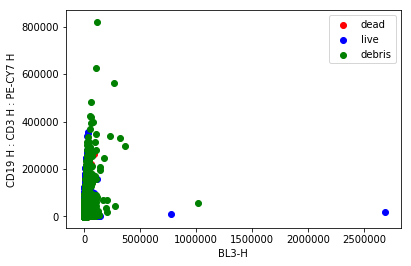

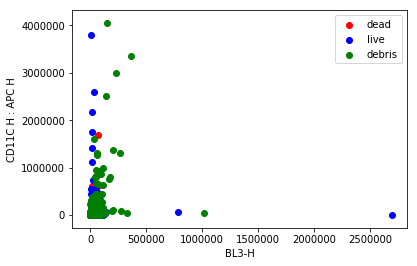

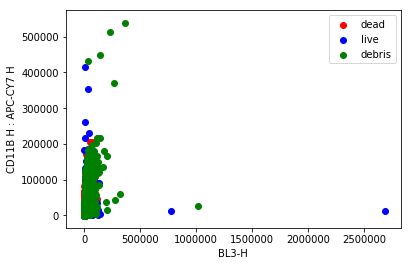

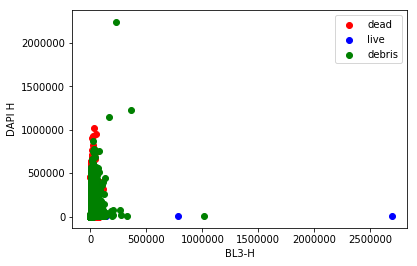

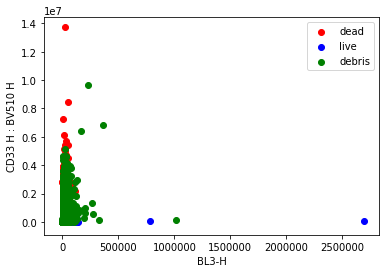

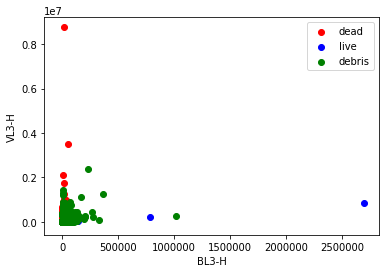

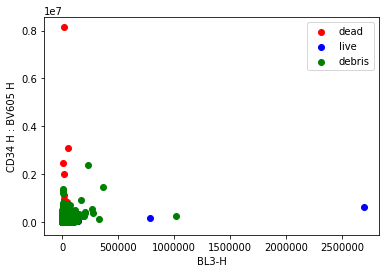

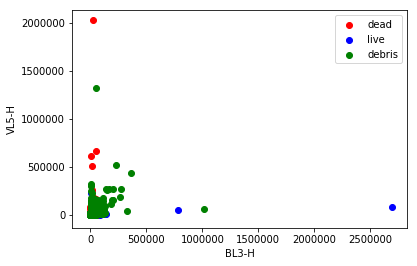

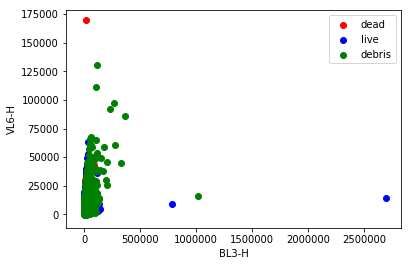

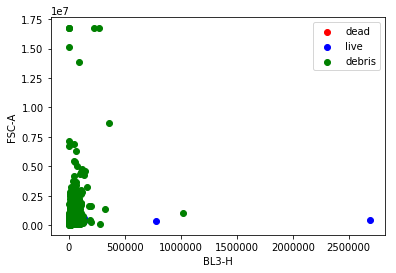

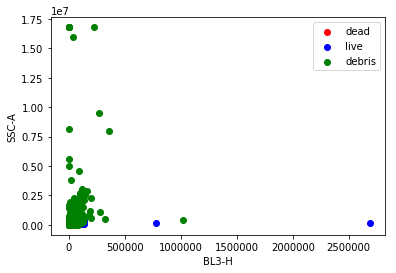

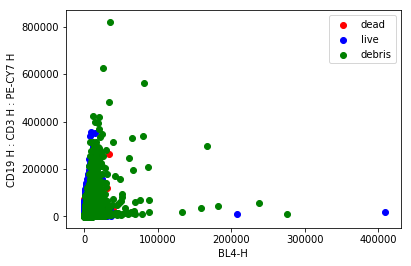

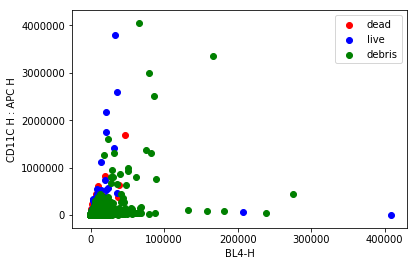

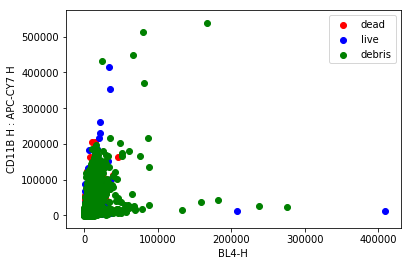

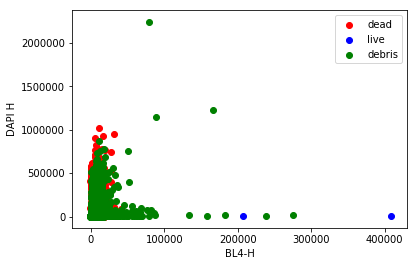

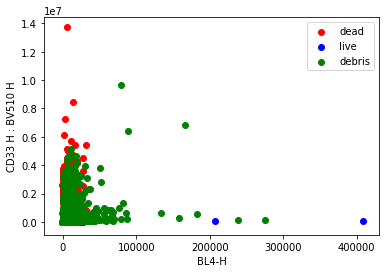

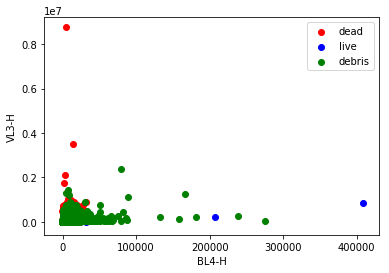

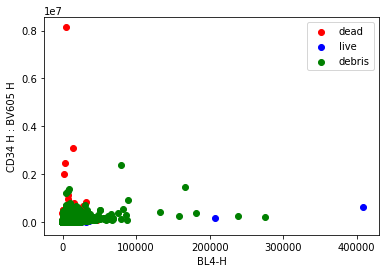

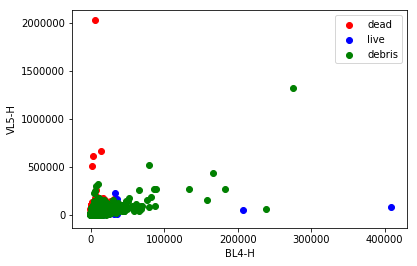

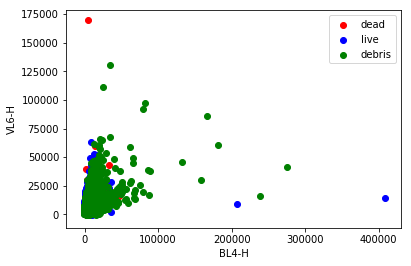

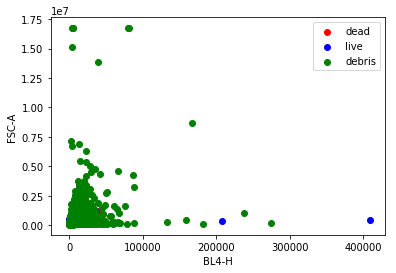

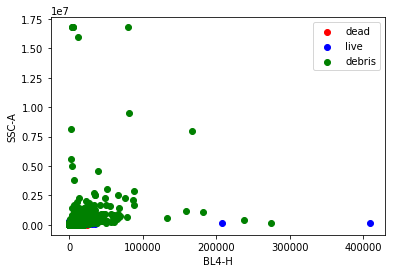

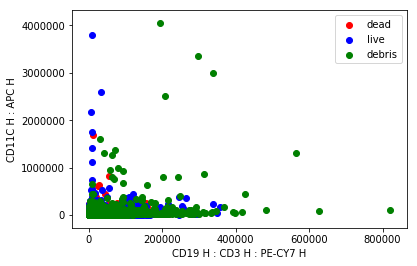

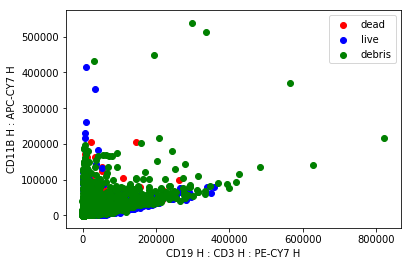

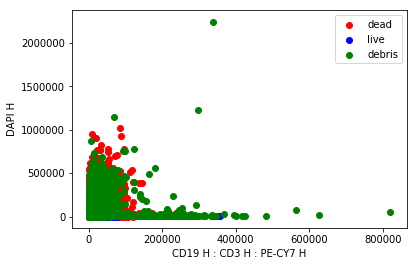

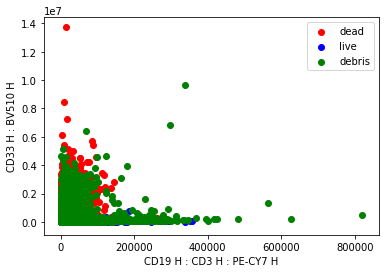

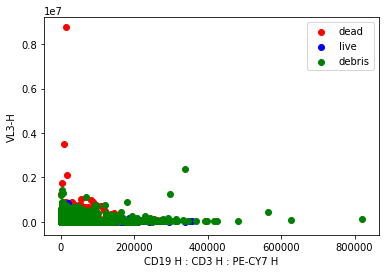

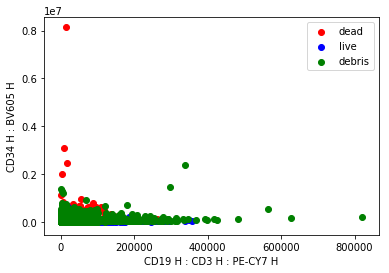

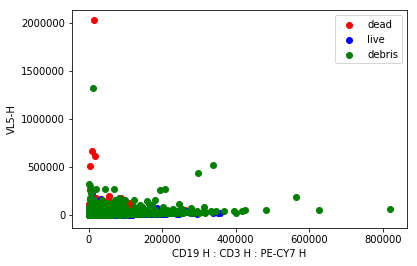

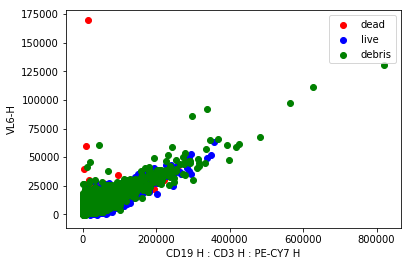

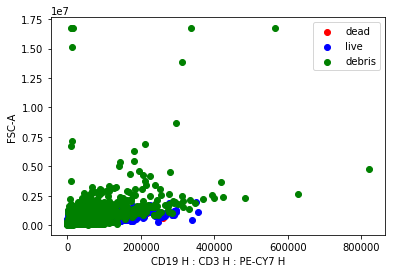

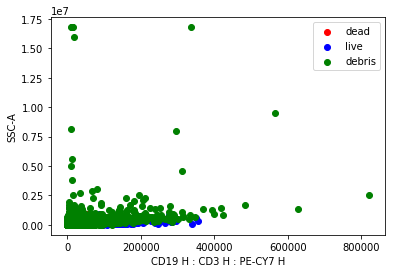

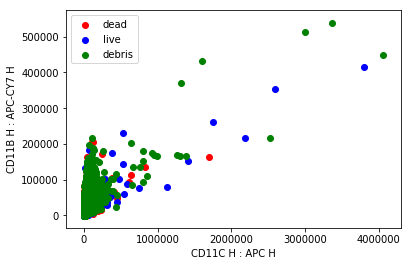

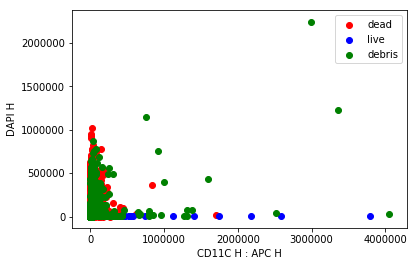

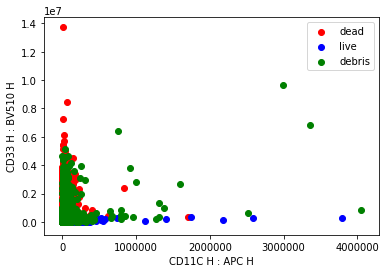

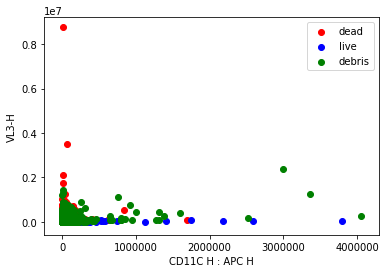

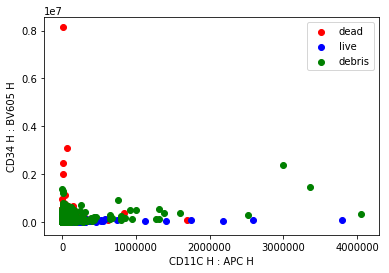

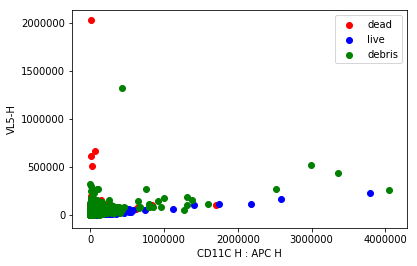

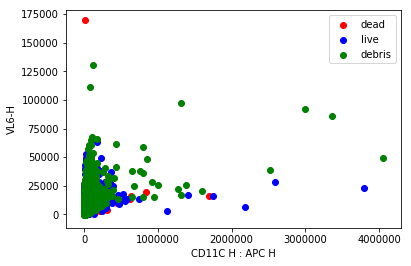

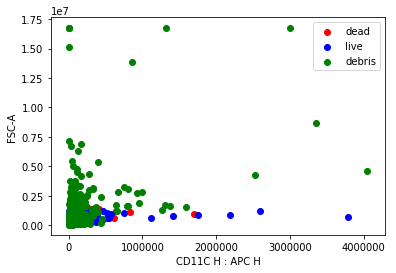

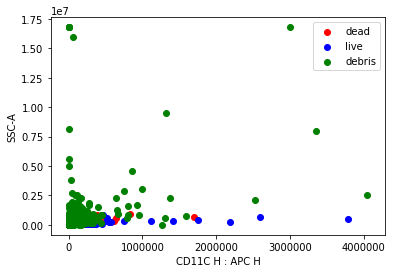

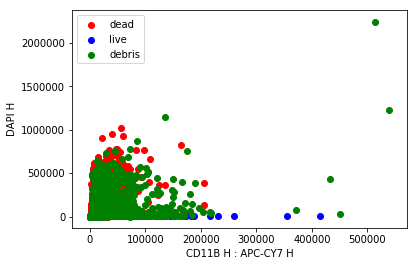

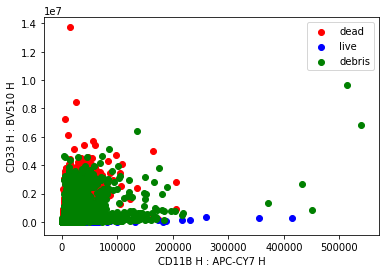

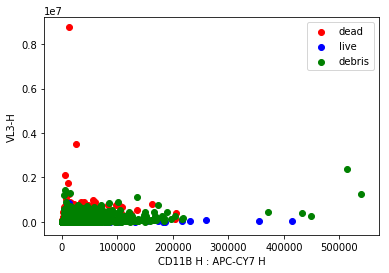

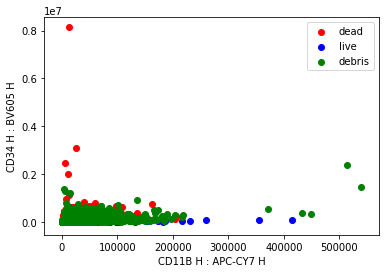

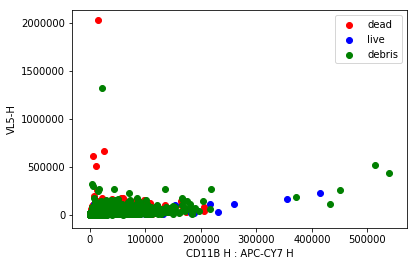

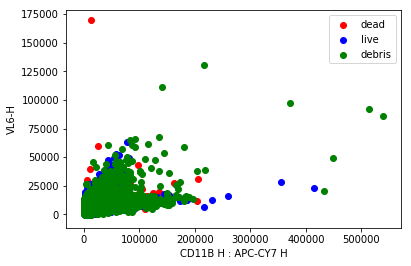

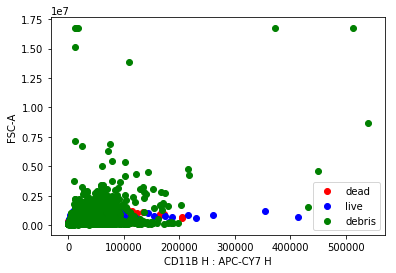

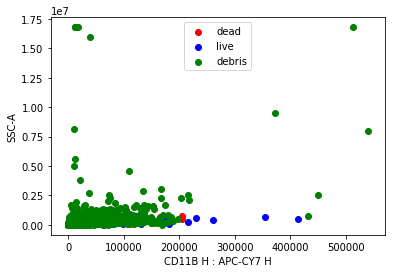

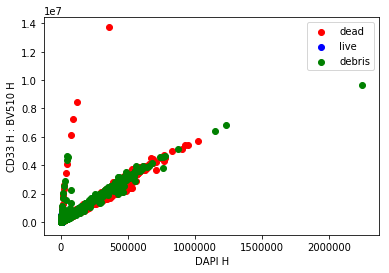

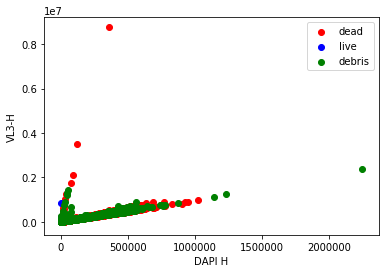

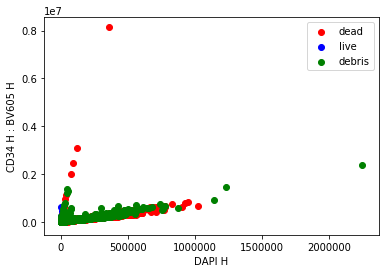

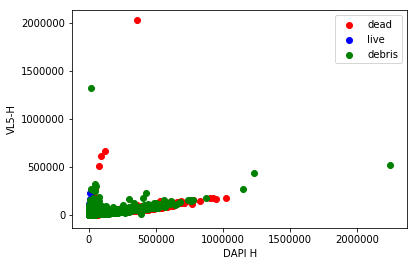

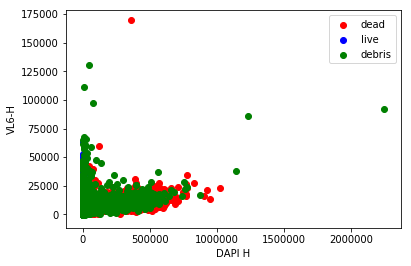

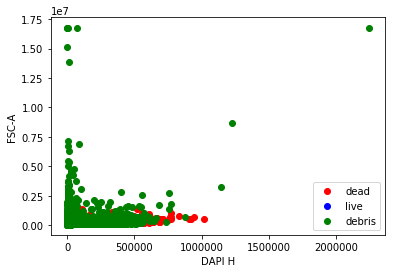

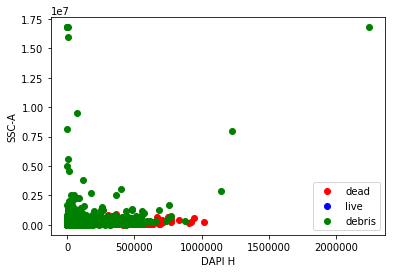

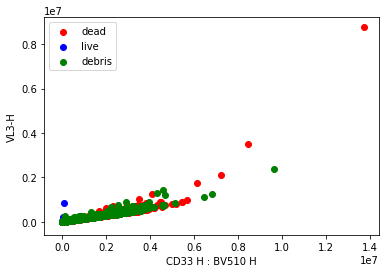

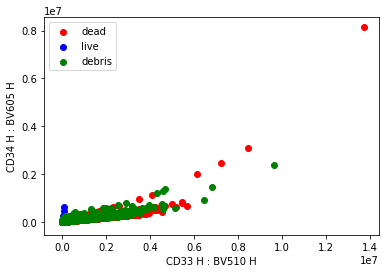

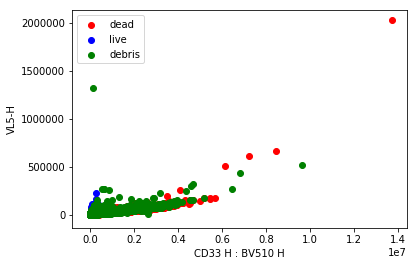

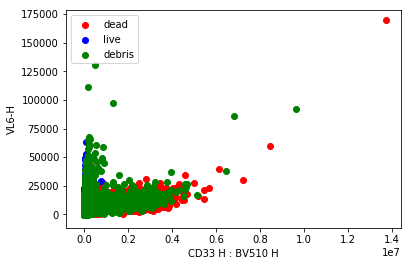

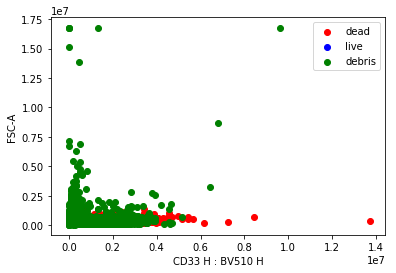

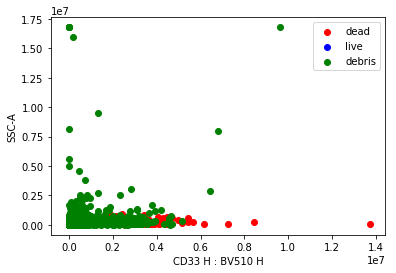

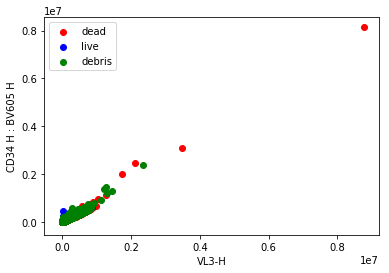

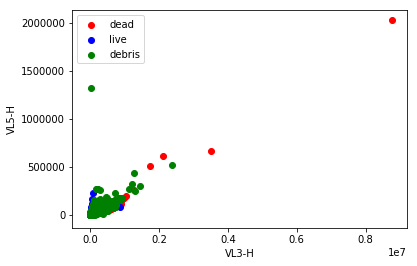

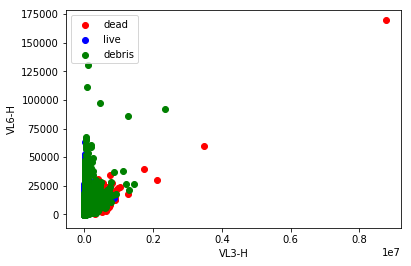

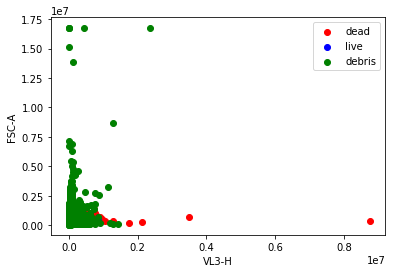

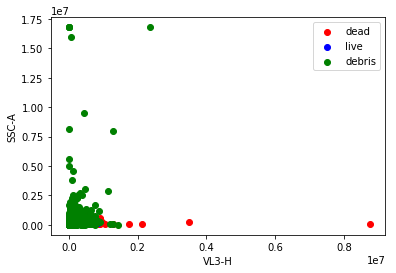

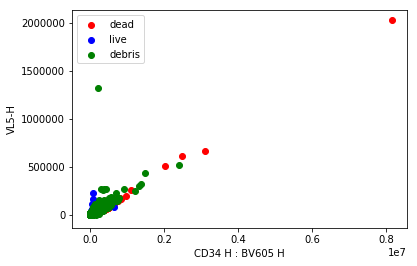

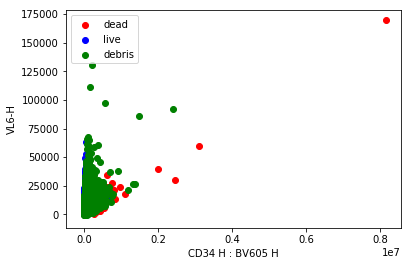

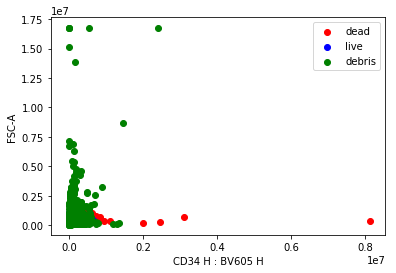

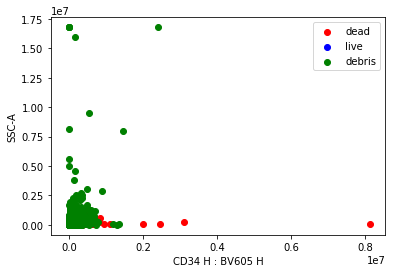

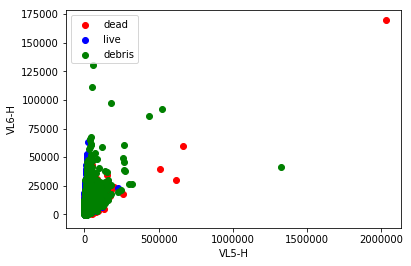

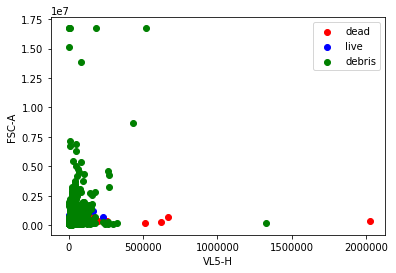

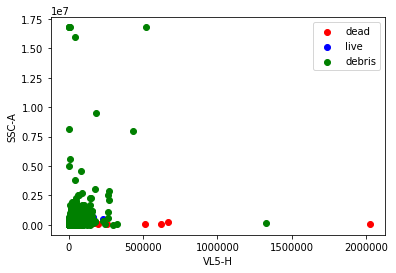

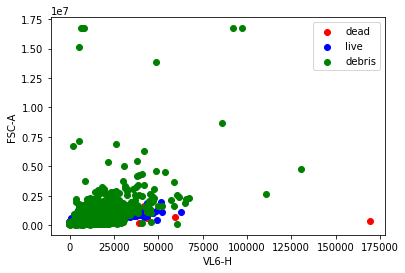

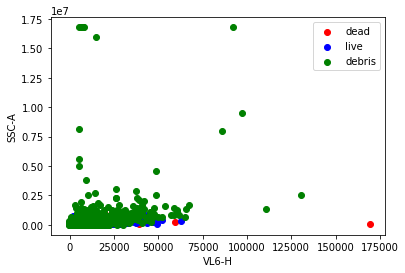

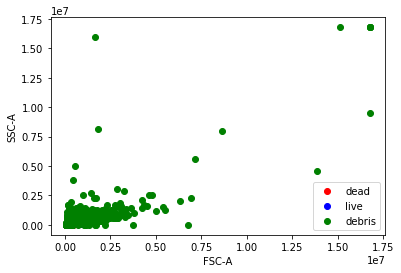

In [187]:
channels=df.columns.values[:17]
for i in range(len(channels)):
    for j in range(i+1,len(channels),1):
        scatter_plot(channels[i],channels[j],df_c3_wlabels)

this function converts labels to integers for easy classification

In [9]:
def label_to_int(label):
    if(label=='live'):
        return 0
    if(label=='dead'):
        return 1
    if(label=='debris'):
        return 2

logistic regression classifier in two dimensions, I found this to be a poor classifier, sensitive to regularization parameters and the training data

In [103]:
def logregclassify_2d( channel1, channel2, dframe):
    X=dframe[ [channel1, channel2] ].values[:5000]
    Y=list( map( label_to_int,dframe['label'].values[:5000]))
    logregclassifier=linear_model.LogisticRegression(C=100) #weak regularization
    logregclassifier.fit(X,Y)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 10000), np.arange(y_min, y_max, 10000))
    Z = logregclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(channel1)
    plt.ylabel(channel2)
    
    plt.xticks(())
    plt.yticks(())
    plt.show()

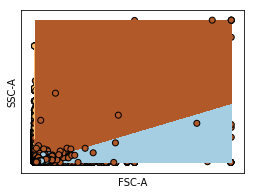

In [104]:
logregclassify_2d('FSC-A','SSC-A',df_c3_wlabels)

I also tried a svm classifier and also found it to be not very good

In [36]:
def svmclassify_2d(channel1,channel2,dframe):
    X=dframe[ [channel1, channel2] ].values[:500]
    Y=list( map( label_to_int,dframe['label'].values[:500]))
    #svmclassifier=svm.SVC(kernel='linear', C=1)
    svmclassifier=svm.LinearSVC(C=100)
    svmclassifier.fit(X,Y)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 10000), np.arange(y_min, y_max, 10000))
    Z = svmclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    #plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(channel1)
    plt.ylabel(channel2)
    
    plt.xticks(())
    plt.yticks(())
    plt.show()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 

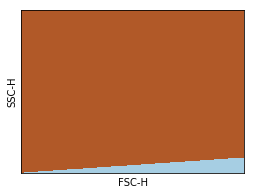

In [37]:
svmclassify_2d('FSC-H','SSC-H',df_c3_wlabels)

the nearest centroid classifier was best. The function below trains a classifier, scores it on the test data, and produces a figure showing the regions corresponding to the different labels

In [100]:
def nearest_centroid_classify(channel1,channel2,dframe):
    N_samples= dframe.shape[0]
    X_train=dframe[ [channel1, channel2] ].values[:int(.9*N_samples)]
    Y_train=list( map( label_to_int,dframe['label'].values[:int(0.9*N_samples)]))
    
    X_test=dframe[ [channel1, channel2] ].values[int(.9*N_samples):]
    Y_test=list( map( label_to_int,dframe['label'].values[int(0.9*N_samples):]))
    
    ncclassifier=NearestCentroid()
    ncclassifier.fit(X_train,Y_train)

    print (ncclassifier.score(X_test,Y_test), channel1, channel2)
    
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 10000), np.arange(y_min, y_max, 10000))
    Z = ncclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(channel1)
    plt.ylabel(channel2)
    
    plt.xticks(())
    plt.yticks(())
    #plt.show() 

In [101]:
nearest_centroid_classify('FSC-A','SSC-H',df_c3_wlabels)

0.747657142857 FSC-A SSC-H


this loops over all pairs of channels to see which one has the highest score when using the nearest centroid classifier. I'm just using the standard euclidean metrid, this could probably be improved by scaling the coordinates so that variance is the same in each dimension.

In [105]:
channels=df.columns.values[:17]
for i in range(len(channels)):
    for j in range(i+1,len(channels),1):
        nearest_centroid_classify(channels[i],channels[j],df_c3_wlabels)

0.811885714286 FSC-H SSC-H
0.785828571429 FSC-H CD66B H : FITC H
0.785142857143 FSC-H KIT H : PE H
0.785142857143 FSC-H BL3-H
0.785142857143 FSC-H BL4-H
0.784228571429 FSC-H CD19 H : CD3 H : PE-CY7 H
0.7856 FSC-H CD11C H : APC H
0.785828571429 FSC-H CD11B H : APC-CY7 H
0.888914285714 FSC-H DAPI H
0.881142857143 FSC-H CD33 H : BV510 H
0.887314285714 FSC-H VL3-H
0.8736 FSC-H CD34 H : BV605 H
0.792228571429 FSC-H VL5-H
0.785142857143 FSC-H VL6-H
0.7856 FSC-H FSC-A
0.8032 FSC-H SSC-A
0.5056 SSC-H CD66B H : FITC H
0.506057142857 SSC-H KIT H : PE H
0.505828571429 SSC-H BL3-H
0.505828571429 SSC-H BL4-H
0.517028571429 SSC-H CD19 H : CD3 H : PE-CY7 H
0.505828571429 SSC-H CD11C H : APC H
0.505828571429 SSC-H CD11B H : APC-CY7 H
0.560914285714 SSC-H DAPI H
0.664228571429 SSC-H CD33 H : BV510 H
0.562514285714 SSC-H VL3-H
0.552228571429 SSC-H CD34 H : BV605 H
0.5056 SSC-H VL5-H
0.506057142857 SSC-H VL6-H
0.747657142857 SSC-H FSC-A
0.504228571429 SSC-H SSC-A
0.351314285714 CD66B H : FITC H KIT H : P

The above read out shows the classification score on the test set based on which channels are used, the highest score is for the channels 'FSC-H' and 'DAPI H' so I'll use these two dimensions to classify the events.

In [108]:
N_samples= df_c3_wlabels.shape[0]
X_train=df_c3_wlabels[ ['FSC-H', 'DAPI H'] ].values
Y_train=list( map( label_to_int,df_c3_wlabels['label'].values))
clf=NearestCentroid()
clf.fit(X_train,Y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [109]:
df_c3_live=df_c3_wlabels[clf.predict(df_c3_wlabels[ ['FSC-H', 'DAPI H'] ])==0]

In [114]:
df_c3_live.shape

(19409, 34)

Writes out the modified well c3 data to a file containing only those classified as live. I could not figure out how to write an fcs file so it's in csv format

In [186]:
df_c3_live.to_csv("Well_C03_live.csv")